<h1 style="color: black; padding: 15px; display: table; text-align: center; 
           box-shadow: 5px 5px 10px rgba(0,0,0,0.3); width: fit-content; margin: auto;">
  <span style="background-color: #f5f5f5; padding: 5px; border: 3px solid black; display: inline-block;">
    Simple Linear Regression(built in)  
  </span>
</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/salary-vs-experience/Salary_Data.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcbeea9b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcbeea99330>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7bcbeea9b520>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcbeea9a350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcbee95a380>],
 'means': []}

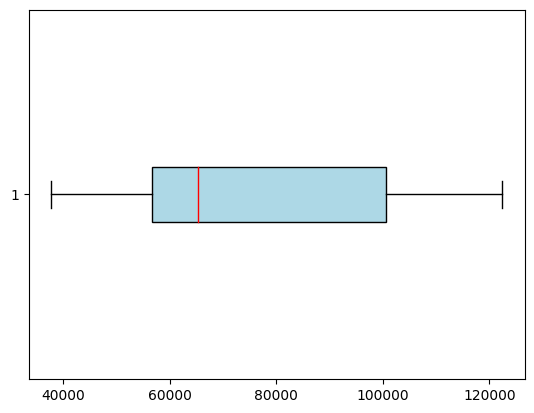

In [8]:
plt.boxplot(data['Salary'],vert=False,patch_artist=True,medianprops=dict(color='red'),boxprops=dict(facecolor='lightblue', color='black'))

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcbee92fc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcbee92fee0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7bcbee92ef50>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcbee92f700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcbee92f4c0>],
 'means': []}

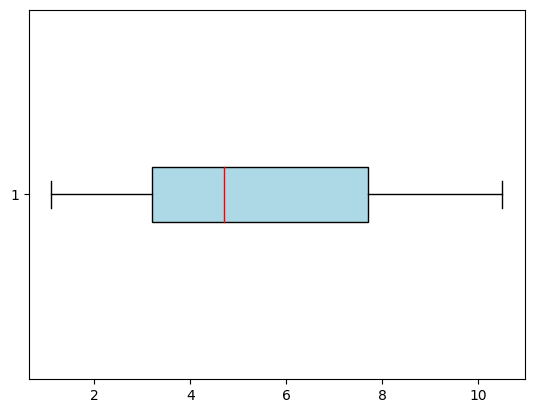

In [9]:
plt.boxplot(data['YearsExperience'],vert=False,patch_artist=True,medianprops=dict(color='red'),boxprops=dict(facecolor='lightblue', color='black'))

In [10]:
skewness=data['YearsExperience'].skew()
print(skewness)

0.37956024064804106


In [11]:
skewness=data['Salary'].skew()
print(skewness)

0.35411967922959153


In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
SalaryRegression=LinearRegression()
SalaryRegression.fit(X_train,Y_train)

LinearRegression()

In [15]:
Y_predict=SalaryRegression.predict(X_test)

Text(0, 0.5, 'Salary')

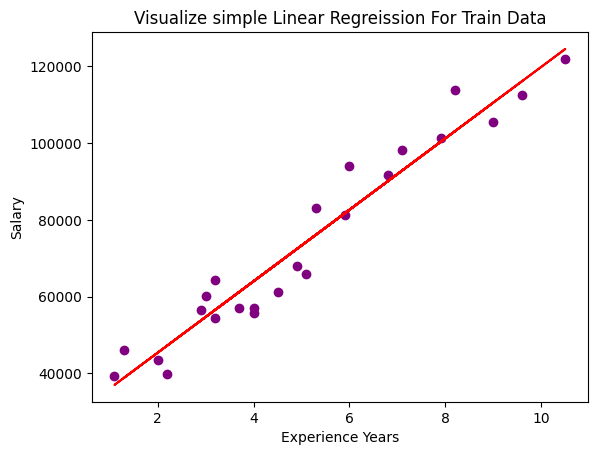

In [16]:
plt.scatter(X_train,Y_train,color='purple')
plt.plot(X_train,SalaryRegression.predict(X_train),color='red')
plt.title('Visualize simple Linear Regreission For Train Data')
plt.xlabel('Experience Years')
plt.ylabel('Salary')


Text(0, 0.5, 'Salary')

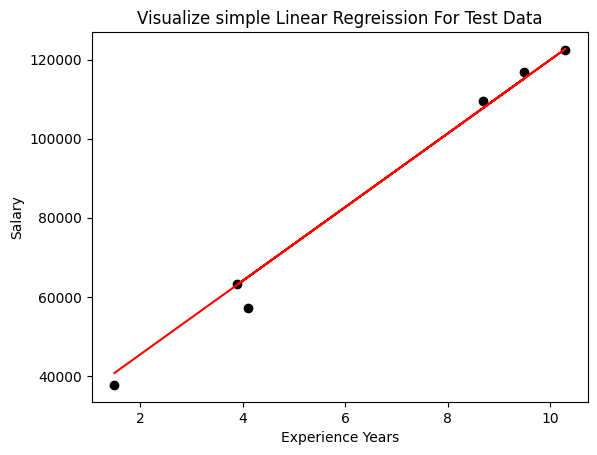

In [17]:
plt.scatter(X_test,Y_test,color='black')
plt.plot(X_test,Y_predict,color='red')
plt.title('Visualize simple Linear Regreission For Test Data')
plt.xlabel('Experience Years')
plt.ylabel('Salary')

In [18]:
metrics.r2_score(Y_test,Y_predict)

0.988169515729126

In [19]:
metrics.mean_squared_error(Y_test,Y_predict)

12823412.298126603

In [20]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_predict))

3580.979237321351

<h1 style="color: black; padding: 15px; display: table; text-align: center; 
           box-shadow: 5px 5px 10px rgba(0,0,0,0.3); width: fit-content; margin: auto;">
  <span style="background-color: #f5f5f5; padding: 5px; border: 3px solid black; display: inline-block;">
    Simple Linear Regression(Model From Scratch)  
  </span>
</h1>


In [21]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [22]:
x=data['YearsExperience']
y=data['Salary']

In [23]:
xmean=np.mean(x)
ymean=np.mean(y)
numerator=0
denomerator=0
for i in range(len(x)):
    numerator+=(x.iloc[i]-xmean)*(y.iloc[i]-ymean)
    denomerator+=((x.iloc[i]-xmean)**2)
w=numerator / denomerator
b=ymean-(w*xmean)  

In [24]:
y_predict_train=[]
for i in range(len(X_train)):
    y=w*X_train.iloc[i]+b
    y_predict_train.append(y)

In [25]:
y_predict_test=[]
for i in range(len(X_test)):
    y=w*(X_test.iloc[i])+b
    y_predict_test.append(y)

Text(0, 0.5, 'Salary')

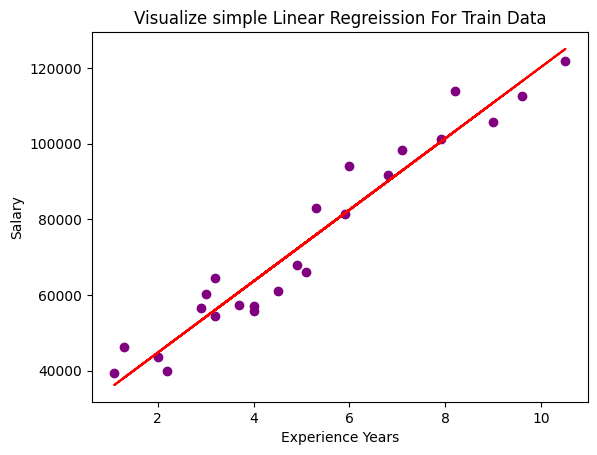

In [26]:
plt.scatter(X_train,Y_train,color='purple')
plt.plot(X_train,y_predict_train,color='red')
plt.title('Visualize simple Linear Regreission For Train Data')
plt.xlabel('Experience Years')
plt.ylabel('Salary')


Text(0, 0.5, 'Salary')

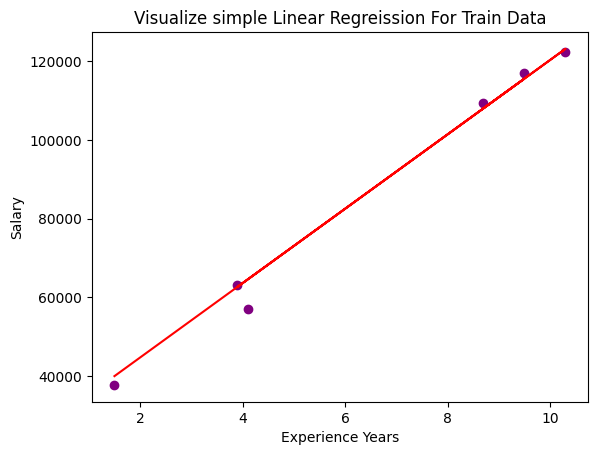

In [27]:
plt.scatter(X_test,Y_test,color='purple')
plt.plot(X_test,y_predict_test,color='red')
plt.title('Visualize simple Linear Regreission For Train Data')
plt.xlabel('Experience Years')
plt.ylabel('Salary')


In [28]:
def MSE(Y_test,y_predict_test):
    n=len(Y_test)
    summation=0
    for i in range(n):
        summation+=((Y_test[i]-y_predict_test[i])**2)
    return summation/n
Y_test=np.array(Y_test)
y_predict_test=np.array(y_predict_test)
print(MSE(Y_test,y_predict_test))
        

[10909090.28710283]


In [29]:
print(np.sqrt(MSE(Y_test,y_predict_test)))

[3302.89120122]


In [30]:
def R2_Score(Y_test,y_predict_test):
    numerator=0
    denomerator=0
    for i in range(len(Y_test)):
        numerator+=((Y_test[i]-y_predict_test[i])**2)
        denomerator+=((Y_test[i]-ymean)**2)
    return (1-(numerator/denomerator))
print(R2_Score(Y_test,y_predict_test))

[0.99055999]


<h1 style="color: black; padding: 15px; display: table; text-align: center; 
           box-shadow: 5px 5px 10px rgba(0,0,0,0.3); width: fit-content; margin: auto;">
  <span style="background-color: #f5f5f5; padding: 5px; border: 3px solid black; display: inline-block;">
    Simple Linear Regression(Model From Scratch with Gradient Descent )  
  </span>
</h1>


In [31]:
def Gradient_Descent(X_train,Y_train,learning_rate=.01,iteration=1000):
    X_train=np.array(X_train)
    Y_train=np.array(Y_train)
    w_new=0
    b_new=0
    n=len(X_train)
    for j in range(iteration):
        w_dervi=0
        b_dervi=0
        for i in range(len(X_train)):
            w_dervi+=(-2*(X_train[i]*(Y_train[i]-w_new*X_train[i]-b_new)))/n
            b_dervi+=(-2*(Y_train[i]-w_new*X_train[i]-b_new))/n
        w_new-=learning_rate*w_dervi
        b_new-=learning_rate*b_dervi
    return w_new,b_new

In [32]:
w,b=Gradient_Descent(X_train,Y_train,learning_rate=.01,iteration=1000)

In [33]:
y_predict_train=[]
for i in range(len(X_train)):
    y=w*X_train.iloc[i]+b
    y_predict_train.append(y)

In [34]:
y_predict_test=[]
for i in range(len(X_test)):
    y=w*(X_test.iloc[i])+b
    y_predict_test.append(y)

Text(0, 0.5, 'Salary')

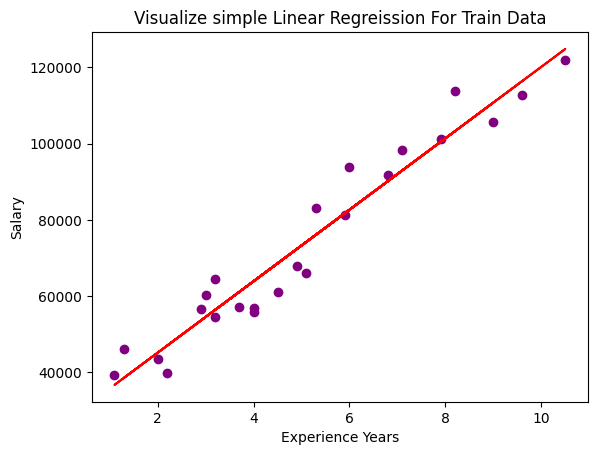

In [35]:
plt.scatter(X_train,Y_train,color='purple')
plt.plot(X_train,y_predict_train,color='red')
plt.title('Visualize simple Linear Regreission For Train Data')
plt.xlabel('Experience Years')
plt.ylabel('Salary')


Text(0, 0.5, 'Salary')

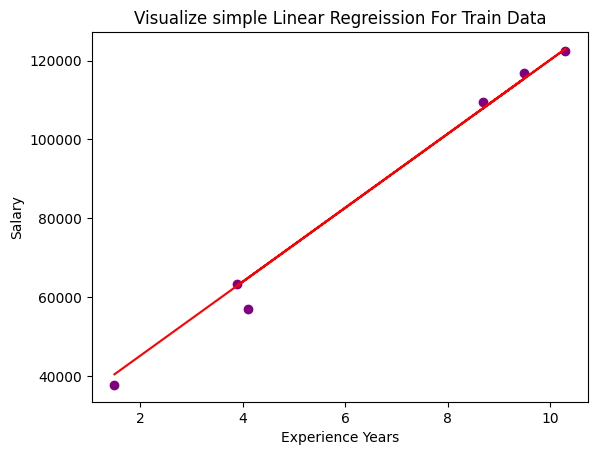

In [36]:
plt.scatter(X_test,Y_test,color='purple')
plt.plot(X_test,y_predict_test,color='red')
plt.title('Visualize simple Linear Regreission For Train Data')
plt.xlabel('Experience Years')
plt.ylabel('Salary')


In [37]:
def MSE(Y_test,y_predict_test):
    n=len(Y_test)
    summation=0
    for i in range(n):
        summation+=((Y_test[i]-y_predict_test[i])**2)
    return summation/n
Y_test=np.array(Y_test)
y_predict_test=np.array(y_predict_test)
print(MSE(Y_test,y_predict_test))
        

[11964042.47204333]


In [38]:
print(np.sqrt(MSE(Y_test,y_predict_test)))

[3458.90769927]


In [39]:
def R2_Score(Y_test,y_predict_test):
    numerator=0
    denomerator=0
    for i in range(len(Y_test)):
        numerator+=((Y_test[i]-y_predict_test[i])**2)
        denomerator+=((Y_test[i]-ymean)**2)
    return (1-(numerator/denomerator))
print(R2_Score(Y_test,y_predict_test))

[0.9896471]
